In [1]:
import os
import cv2 as cv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def fix_layout(width:int=95):
    from IPython.core.display import display, HTML
    display(HTML('<style>.container { width:' + str(width) + '% !important; }</style>'))

fix_layout()

In [3]:
# reminder: image is downscaled by 3, we need to downscale the label coordinates as well
scale = 3

In [4]:
DATASET_NUMBER = 3

AUGMENTED_DATASET_PATH = "../augmented_dataset"
FLUO_CROPPED_PATH = f"{AUGMENTED_DATASET_PATH}/fluo_cropped_{DATASET_NUMBER}"
TEST_IMAGES_PATH = "test_images"
# location of silicon wafer 1 data
WAFER_PATH = f"../dataset/silicon_wafer_{DATASET_NUMBER}"

In [5]:
index = pd.MultiIndex.from_tuples([('point_1', 'x'), ('point_1', 'y'), ('point_2', 'x'), ('point_2', 'y'),
                                   ('point_3', 'x'), ('point_3', 'y'), ('point_4', 'x'), ('point_4', 'y')])

## Load Wafer Image [RED channel]

In [6]:
path_img= f"{WAFER_PATH}/wafer_{DATASET_NUMBER}_downsized_3.tif"
if os.path.isfile(path_img):
    wafer_img = cv.imread(path_img, 0)
else:
    print ("The file " + path_img + " does not exist.")

In [7]:
wafer_img.shape

(6367, 8041)

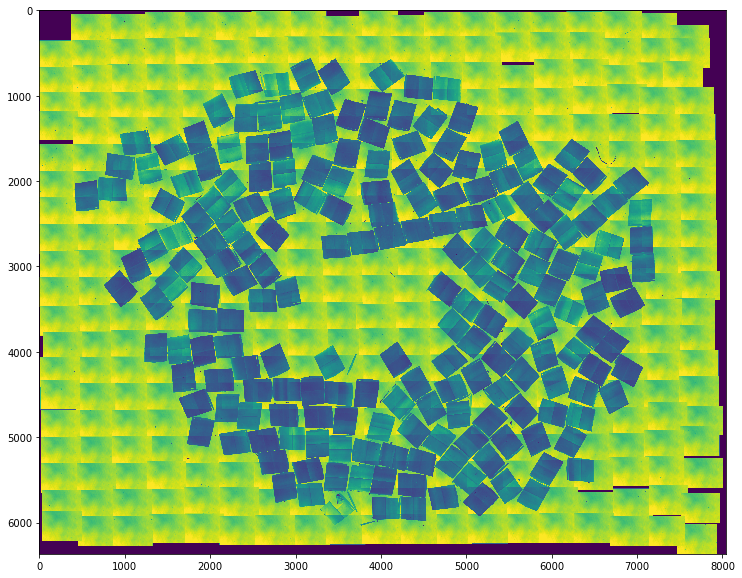

In [8]:
plt.figure(figsize=(15, 10))
plt.imshow(wafer_img)

## Load Fluorescent Wafer Image [GREEN channel]

In [9]:
path_img_magfluo= f"{WAFER_PATH}/wafer_{DATASET_NUMBER}_downsized_3_magFluo.tif"
if os.path.isfile(path_img):
    wafer_fluo_img = cv.imread(path_img_magfluo, 0) # wafer_1_magfluo = cv.cvtColor(wafer_1_magfluo, cv.COLOR_BGR2GRAY)
else:
    print ("The file " + path_img_magfluo + " does not exist.")

In [10]:
wafer_fluo_img.shape

(6366, 8071)

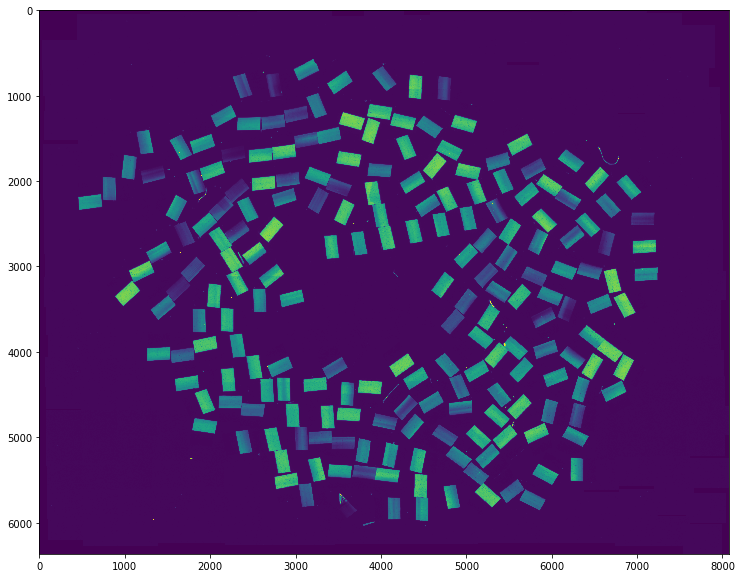

In [11]:
plt.figure(figsize=(15, 10))
plt.imshow(wafer_fluo_img)

### Translate Image by the vaues already determined in `prepare_wafer.ipynb`

In [12]:
# translate by x, y coordinates
translate_by = (-14, 0) if DATASET_NUMBER == 1 else \
                (-41, -24) if  DATASET_NUMBER == 2 else \
                (-35, -1) if DATASET_NUMBER == 3 else (0, 0)

In [13]:
M = np.float32([[1,0,translate_by[0]],[0,1,translate_by[1]]])
wafer_fluo_img = cv.warpAffine(wafer_fluo_img, M, wafer_fluo_img.shape[:2][::-1])

## Blank Image [BLUE channel]

In [14]:
width = min(wafer_img.shape[0], wafer_fluo_img.shape[0])
height = min(wafer_img.shape[1], wafer_fluo_img.shape[1])

In [15]:
blank_img = np.zeros((width, height, 1), np.uint8)

In [16]:
blank_img.shape

(6366, 8041, 1)

# Unite 3 channels

In [17]:
if len(wafer_img.shape) == 2:
    wafer_img = wafer_img[:, :, np.newaxis]
wafer_img = wafer_img[:width,:height]
print(wafer_img.shape)

if len(wafer_fluo_img.shape) == 2:
    wafer_fluo_img = wafer_fluo_img[:, :, np.newaxis]
wafer_fluo_img = wafer_fluo_img[:width,:height]
print(wafer_fluo_img.shape)

print(blank_img.shape)

(6366, 8041, 1)
(6366, 8041, 1)
(6366, 8041, 1)


In [18]:
rgb_img = np.dstack((wafer_img, wafer_fluo_img, blank_img))
print(rgb_img.shape)

(6366, 8041, 3)


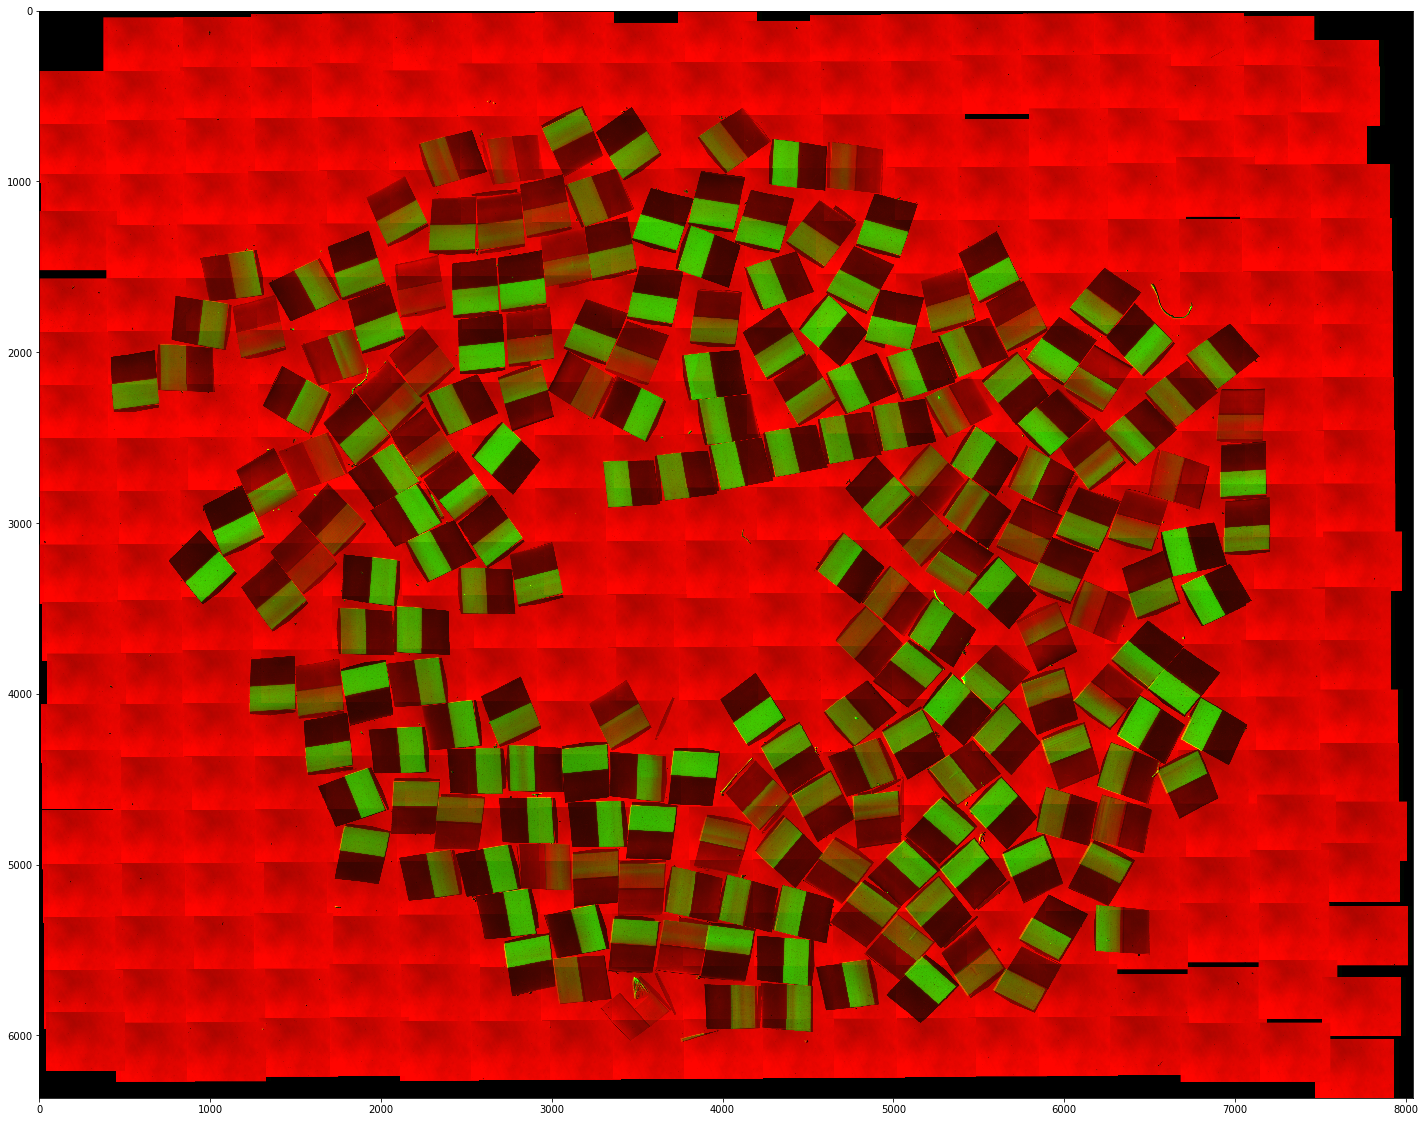

In [19]:
plt.figure(figsize=(25, 20))
plt.imshow(rgb_img)

In [20]:
cv.imwrite(f"{TEST_IMAGES_PATH}/test_rgb_channels.tiff", rgb_img)

True

In [21]:
cv.imwrite(f"{AUGMENTED_DATASET_PATH}/wafer_with_fluo_RGB_{DATASET_NUMBER}.tiff", rgb_img)

True